In [32]:
import shutil
from tqdm import tqdm
import os
import glob
from sklearn.model_selection import train_test_split
from ultralytics import YOLO
import torch
import cv2
import imutils
from PIL import Image
import numpy as np
import math

In [33]:
DATA_DIR = r"C:\Users\mobit\Desktop\drone_detection_final\data\drone_dataset_yolo\dataset_txt"

images = []
labels = []
label_path = glob.glob(os.path.join(DATA_DIR, "*.txt"))

for label_path in tqdm(label_path):     #slicing for insufficient memory
    labels.append(label_path)
    image_paths = label_path.rsplit('.',1)[0] + '.jpg'
    images.append(image_paths)

100%|██████████| 7703/7703 [00:00<00:00, 942714.86it/s]


In [34]:
train_image = []
train_annotation = []

image_file = glob.glob(r"C:\Users\mobit\Desktop\drone_detection_final\data\drone_dataset_yolo\dataset_txt*.jpg")

for i in image_file:     #slicing for insufficient memory
    Load_image = Image.open(i).convert('RGB')
    nmpy_img = Load_image.resize((256, 256))
    train_image.append(np.asarray(nmpy_img))
    
    seperate_path = i.split('.')
    seperate_path[1] = '.txt'
    
    with open(seperate_path[0]+seperate_path[1]) as f:
        lines = f.readlines()
        tmp_lst = lines[0].split(' ')
        #label = int(tmp_lst[0])
        startX = float(tmp_lst[1])
        startY = float(tmp_lst[2])
        endX = float(tmp_lst[3])
        endY = float(tmp_lst[4])
        train_annotation.append((startX, startY, endX, endY))

In [35]:
split = train_test_split(images, labels, test_size=0.10, random_state=42)

(trainImages, testImages) = split[:2]
(trainTargets, testTargets) = split[2:4]

In [36]:
TRAIN_IMAGE_DIR = 'train/images'
TRAIN_LABEL_DIR = 'train/labels'
VAL_IMAGE_DIR = 'valid/images'
VAL_LABEL_DIR = 'valid/labels'

os.makedirs(TRAIN_IMAGE_DIR, exist_ok=True)
os.makedirs(TRAIN_LABEL_DIR, exist_ok=True)

os.makedirs(VAL_IMAGE_DIR, exist_ok=True)
os.makedirs(VAL_LABEL_DIR, exist_ok=True)

for path in tqdm(trainImages):
    shutil.copyfile(path, os.path.join(TRAIN_IMAGE_DIR, os.path.basename(path)))

for path in tqdm(testImages):
    shutil.copyfile(path, os.path.join(VAL_IMAGE_DIR, os.path.basename(path)))

for path in tqdm(trainTargets):
    shutil.copyfile(path, os.path.join(TRAIN_LABEL_DIR, os.path.basename(path)))

for path in tqdm(testTargets):
    shutil.copyfile(path, os.path.join(VAL_LABEL_DIR, os.path.basename(path)))

100%|██████████| 771/771 [00:04<00:00, 166.00it/s]


In [37]:
%%writefile drone.yaml

path: ..
train: train/images
val: valid/images

nc: 1

# Classes
names: ['drone']

Writing drone.yaml


In [38]:
# Disable wandb
os.environ['WANDB_DISABLED'] = 'true'

In [39]:
# Load a model
# model = YOLO("yolov8s.yaml")  # build a new model from scratch
model = YOLO("yolov8s.pt")  # load a pretrained model (recommended for training)

In [40]:
# Use the model
results = model.train(
   data='drone.yaml',
   imgsz=256,
   epochs=3,
   batch=16,
   name='yolov8s_v8_50e'
)  # train the model

Ultralytics YOLOv8.0.227 🚀 Python-3.8.8 torch-2.1.1+cpu CPU (Intel Core(TM) i7-10750H 2.60GHz)
engine\trainer: task=detect, mode=train, model=yolov8s.pt, data=drone.yaml, epochs=3, patience=50, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8s_v8_50e, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchsc

train: Scanning C:\Users\mobit\Desktop\train\labels... 5709 images, 2515 backgrounds, 0 corrupt: 100%|██████████| 8154/8154 [00:15<00:00, 520.75it/s]


train: New cache created: C:\Users\mobit\Desktop\train\labels.cache


val: Scanning C:\Users\mobit\Desktop\valid\labels... 635 images, 793 backgrounds, 0 corrupt: 100%|██████████| 1419/1419 [00:02<00:00, 589.14it/s]


val: New cache created: C:\Users\mobit\Desktop\valid\labels.cache
Plotting labels to runs\detect\yolov8s_v8_50e\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 256 train, 256 val
Using 0 dataloader workers
Logging results to runs\detect\yolov8s_v8_50e
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3         0G     0.8324      1.093     0.9257          7        256: 100%|██████████| 510/510 [18:41<00:00,  2.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [01:22<00:00,  1.83s/it]

                   all       1419        626      0.439      0.974      0.476      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3         0G     0.6563     0.7846     0.8804         15        256: 100%|██████████| 510/510 [14:21<00:00,  1.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [01:00<00:00,  1.34s/it]

                   all       1419        626      0.437      0.939      0.446      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3         0G     0.5547     0.7169     0.8566          8        256: 100%|██████████| 510/510 [13:19<00:00,  1.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [01:03<00:00,  1.42s/it]

                   all       1419        626      0.444      0.998       0.45      0.427



3 epochs completed in 0.832 hours.
Optimizer stripped from runs\detect\yolov8s_v8_50e\weights\last.pt, 22.5MB
Optimizer stripped from runs\detect\yolov8s_v8_50e\weights\best.pt, 22.5MB

Validating runs\detect\yolov8s_v8_50e\weights\best.pt...
Ultralytics YOLOv8.0.227 🚀 Python-3.8.8 torch-2.1.1+cpu CPU (Intel Core(TM) i7-10750H 2.60GHz)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 45/45 [00:58<00:00,  1.29s/it]


                   all       1419        626      0.444      0.998       0.45      0.427
Speed: 0.3ms preprocess, 36.9ms inference, 0.0ms loss, 0.3ms postprocess per image
Results saved to runs\detect\yolov8s_v8_50e


In [41]:
model.export(format='onnx')

Ultralytics YOLOv8.0.227 🚀 Python-3.8.8 torch-2.1.1+cpu CPU (Intel Core(TM) i7-10750H 2.60GHz)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from 'runs\detect\yolov8s_v8_50e\weights\best.pt' with input shape (1, 3, 256, 256) BCHW and output shape(s) (1, 5, 1344) (21.4 MB)

ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success ✅ 0.8s, saved as 'runs\detect\yolov8s_v8_50e\weights\best.onnx' (42.5 MB)

Export complete (2.6s)
Results saved to C:\Users\mobit\Desktop\drone_detection_final\runs\detect\yolov8s_v8_50e\weights
Predict:         yolo predict task=detect model=runs\detect\yolov8s_v8_50e\weights\best.onnx imgsz=256  
Validate:        yolo val task=detect model=runs\detect\yolov8s_v8_50e\weights\best.onnx imgsz=256 data=drone.yaml  
Visualize:       https://netron.app


'runs\\detect\\yolov8s_v8_50e\\weights\\best.onnx'

In [43]:
model2=YOLO(r'C:\Users\mobit\Desktop\drone_detection_final\runs\detect\yolov8s_v8_50e\weights\best.pt')
classNames=model2.names

In [45]:
from PIL import Image as i

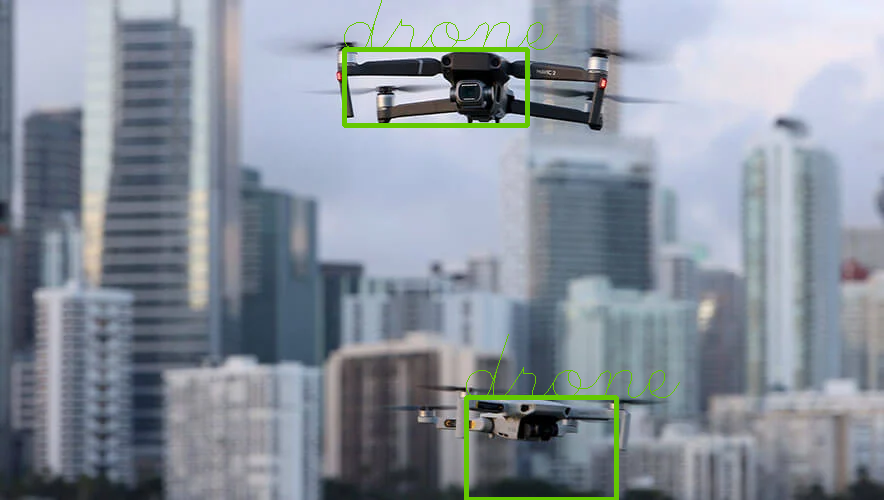

In [105]:
pic=cv2.imread(r"C:\Users\mobit\Desktop\0623-tis-new-exploit-discovered-for-drones.jpg")
# pic=cv2.cvtColor(pic,cv2.COLOR_RGB2BGR)
pic_temp = cv2.cvtColor(pic,cv2.COLOR_RGB2BGR).copy()
blur=cv2.stackBlur(pic ,(3,3),1)

res=model(blur, verbose=False , stream=True)

for r in res:
    boxes=r.boxes
    for box in boxes:
        x1,y1,x2,y2=box.xyxy[0]
        x1,y1,x2,y2 = int(x1),int(y1),int(x2),int(y2)
        cv2.rectangle(pic_temp,(x1,y1),(x2,y2),(100,200,0),3)
        cls=int(box.cls[0])
        cv2.putText(pic_temp,classNames[cls],[x1,y1],cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,3,(100,200,0))
i.fromarray(pic_temp)

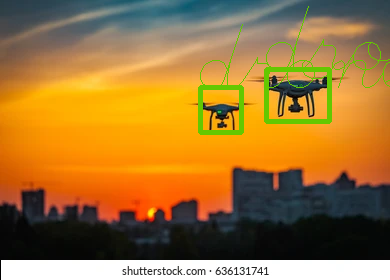

In [102]:
pic=cv2.imread(r"C:\Users\mobit\Desktop\two-drone-quad-copters-high-260nw-636131741.jpg")
# pic=cv2.cvtColor(pic,cv2.COLOR_RGB2BGR)
# pic=cv2.resize(pic,(1000,930))
pic_temp = cv2.cvtColor(pic,cv2.COLOR_RGB2BGR).copy()
blur=cv2.stackBlur(pic ,(5,5),1)

res=model(blur, verbose=False , stream=True)

for r in res:
    boxes=r.boxes
    for box in boxes:
        x1,y1,x2,y2=box.xyxy[0]
        x1,y1,x2,y2 = int(x1),int(y1),int(x2),int(y2)
        cv2.rectangle(pic_temp,(x1,y1),(x2,y2),(100,200,0),3)
        cls=int(box.cls[0])
        cv2.putText(pic_temp,classNames[cls],[x1,y1],cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,3,(100,200,0))
i.fromarray(pic_temp)

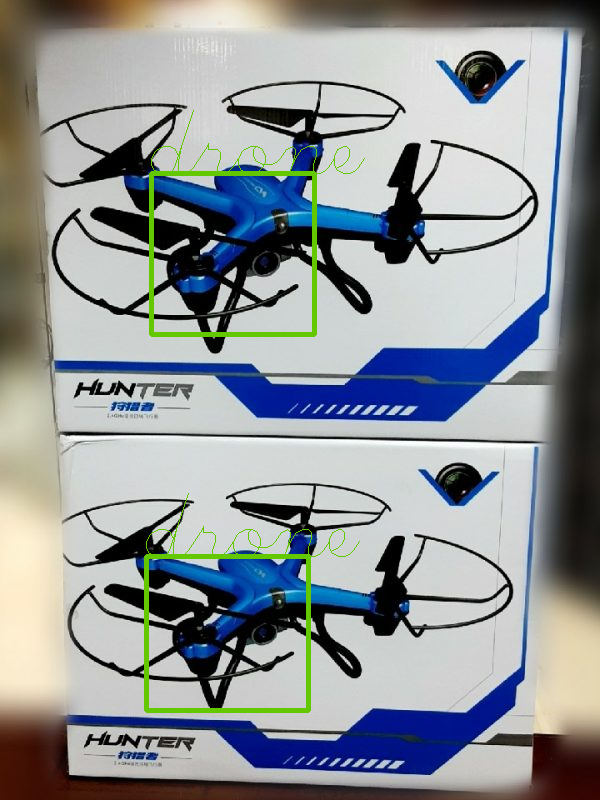

In [112]:
pic=cv2.imread(r"C:\Users\mobit\Desktop\blur.background.squareblur.blurphoto_202174123957471-600x800.jpg")
# pic=cv2.cvtColor(pic,cv2.COLOR_RGB2BGR)
# pic=cv2.resize(pic,(1000,930))
pic_temp = cv2.cvtColor(pic,cv2.COLOR_RGB2BGR).copy()
blur=cv2.stackBlur(pic ,(9,9))

res=model(blur, verbose=False , stream=True)

for r in res:
    boxes=r.boxes
    for box in boxes:
        x1,y1,x2,y2=box.xyxy[0]
        x1,y1,x2,y2 = int(x1),int(y1),int(x2),int(y2)
        cv2.rectangle(pic_temp,(x1,y1),(x2,y2),(100,200,0),3)
        cls=int(box.cls[0])
        cv2.putText(pic_temp,classNames[cls],[x1,y1],cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,3,(100,200,0))
i.fromarray(pic_temp)

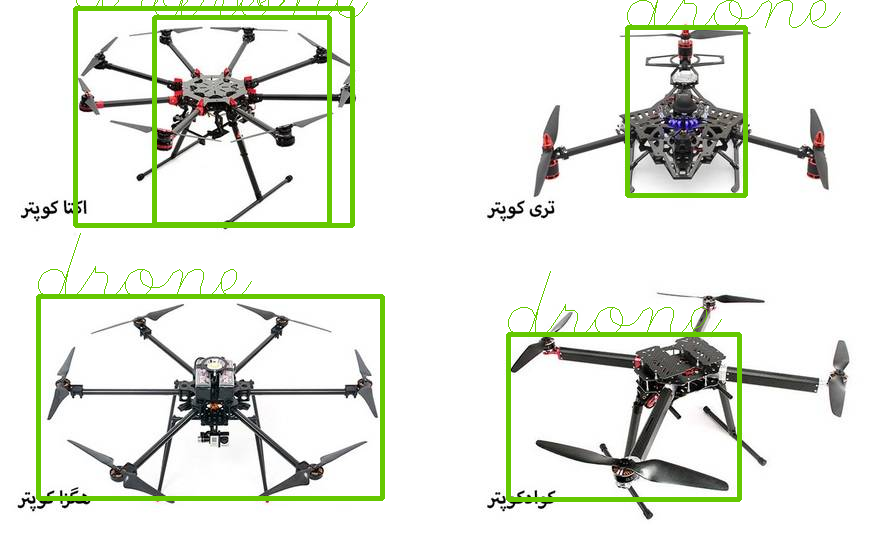

In [119]:
pic=cv2.imread(r"C:\Users\mobit\Desktop\2020-02-15_15-50-28-5-what is quadcopter or quad rotor.jpeg")
# pic=cv2.cvtColor(pic,cv2.COLOR_RGB2BGR)
# pic=cv2.resize(pic,(1000,930))
pic_temp = cv2.cvtColor(pic,cv2.COLOR_RGB2BGR).copy()
blur=cv2.medianBlur(pic ,11,11)

res=model(blur, verbose=False , stream=True)

for r in res:
    boxes=r.boxes
    for box in boxes:
        x1,y1,x2,y2=box.xyxy[0]
        x1,y1,x2,y2 = int(x1),int(y1),int(x2),int(y2)
        cv2.rectangle(pic_temp,(x1,y1),(x2,y2),(100,200,0),3)
        cls=int(box.cls[0])
        cv2.putText(pic_temp,classNames[cls],[x1,y1],cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,3,(100,200,0))
i.fromarray(pic_temp)

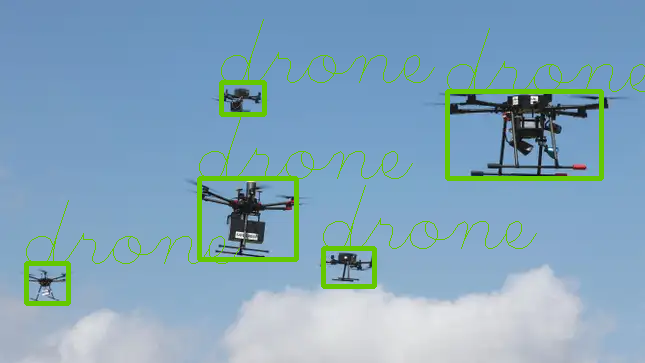

In [122]:
pic=cv2.imread(r"C:\Users\mobit\Desktop\4be743f447e2a0c53f908de98d586956.webp")
pic=cv2.cvtColor(pic,cv2.COLOR_RGB2BGR)
pic_temp = pic.copy()
blur=cv2.GaussianBlur(pic ,(1,1),1)

res=model(blur, verbose=False , stream=True)

for r in res:
    boxes=r.boxes
    for box in boxes:
        x1,y1,x2,y2=box.xyxy[0]
        x1,y1,x2,y2 = int(x1),int(y1),int(x2),int(y2)
        cv2.rectangle(pic_temp,(x1,y1),(x2,y2),(100,200,0),3)
        cls=int(box.cls[0])
        cv2.putText(pic_temp,classNames[cls],[x1,y1],cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,3,(100,200,0))
i.fromarray(pic_temp)

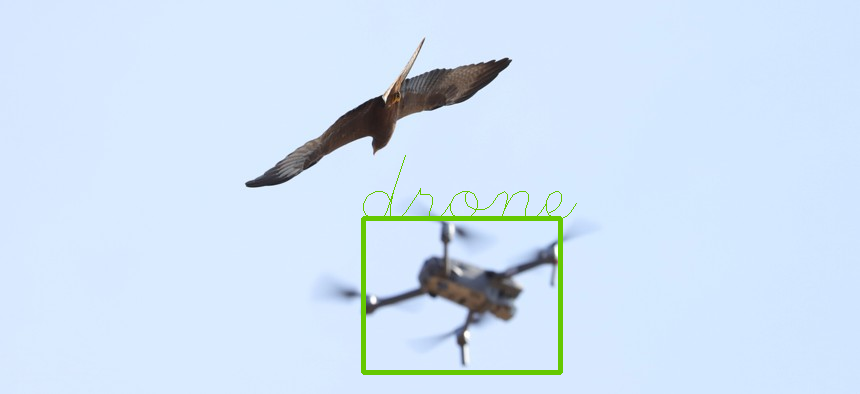

In [124]:
pic=cv2.imread(r"C:\Users\mobit\Desktop\drone.jpg")
pic=cv2.cvtColor(pic,cv2.COLOR_RGB2BGR)
pic_temp = pic.copy()
blur=cv2.GaussianBlur(pic ,(7,7),1)

res=model(blur, verbose=False , stream=True)

for r in res:
    boxes=r.boxes
    for box in boxes:
        x1,y1,x2,y2=box.xyxy[0]
        x1,y1,x2,y2 = int(x1),int(y1),int(x2),int(y2)
        cv2.rectangle(pic_temp,(x1,y1),(x2,y2),(100,200,0),3)
        cls=int(box.cls[0])
        cv2.putText(pic_temp,classNames[cls],[x1,y1],cv2.FONT_HERSHEY_SCRIPT_SIMPLEX,3,(100,200,0))
i.fromarray(pic_temp)